## Predicting Occupation based off of Economic and Demographic Features

By Luke Hendriksen and Keanna Price

## Introduction

We found our dataset, the Gender Pay Gap Dataset, on Kaggle(https://www.kaggle.com/datasets/fedesoriano/gender-pay-gap-dataset?select=CurrentPopulationSurvey.csv), and trimmed it down slightly in excel prior to working in Jupyter Lab. This dataset is originally derived from the Panel Study of Income Dynamics spanning 1980-2013. It contains information on members of the workforce during this time period such as sex, age, years of completed education, years of working experience, hourly wage, the usual amount of hours worked per week, and many more. 

We plan on using the variables in our cleaned dataset to predict the occupation of the worker those variables belong to.

We are trying to predict the occupations of workers based on some of their personal and professional demographics. Through our explanation and analysis of the data prior to making the prediction, we will also be looking at different facets of occupations to understand and possibly highlight any underlying biases. This data set was compiled to help understand the gender pay gap better and we hope to take it further and look at more than just gender, to reveal the potential problems within each occupation. 

## Tidying the Data

In [1]:
import numpy as np #linear algebra
import pandas as pd #data processing
import matplotlib.pyplot as plt #data visualisation
import seaborn as sns #data visualisation
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
import statistics as st
from sklearn.cluster import KMeans, MeanShift
from sklearn.preprocessing import StandardScaler

In [5]:
path = (r"C:\Users\keann\OneDrive\Documents\CS 250")
os.listdir(path)

['.ipynb_checkpoints',
 'avocado.ipynb',
 'avocadoes2020',
 'Clustering.ipynb',
 'Clustering_with_colors.ipynb',
 'COVID Case Study (2).ipynb',
 'COVID old Case Study.ipynb',
 'covid-data.csv',
 'CSCI 250 HW 1.ipynb',
 'Fish.csv',
 'FishMarket-Regression.ipynb',
 'HW 3_draft.ipynb',
 'HW2_keannaPrice_cs250.ipynb',
 'HW2_Solution.ipynb',
 'HW3_KeannaPrice_cs250.ipynb',
 'HW4_keannaprice_csci250.ipynb',
 'HW5_keannaprice_cs250.ipynb',
 'Intro1.ipynb',
 'LinearRegression.ipynb',
 'LogReg_2class_MNIST.ipynb',
 'LogReg_multiclass_MNIST.ipynb',
 'Math Quiz 3.ipynb',
 'math240 notes.jpg',
 'math240notes.jpg',
 'MNIST_intro.ipynb',
 'MNIST_PCA.ipynb',
 'Normalization, KNN and more.ipynb',
 'old Ramen_analysis.ipynb',
 'oldFishMarket.ipynb',
 'owid-covid-data.csv',
 'pca explanation 1.png',
 'pca explanation 5.png',
 'pca explantion 2.png',
 'pca explantion 3.png',
 'pca explantion 4.png',
 'possum.csv',
 'practice Midterm.ipynb',
 'PracticeMidterm1.pdf',
 'Project 1',
 'project1_1.png',
 'Proj

In [6]:
df = pd.read_csv(path + r'/Project1_csci250.csv')
df = pd.DataFrame(df)
df.head()

,sex,age,annhrs,white,black,hisp,othrace,schupd,annwks,usualhrwk,...,healthsupport,protective,foodcare,building,sales,officeadmin,farmer,constructextractinstall,production,transport
0,1,34,1600,1,0,0,0,17,32.000000,50.0,...,0,0,0,0,1,0,0,0,0,0
1,1,32,520,0,1,0,0,14,13.000000,40.0,...,0,0,0,0,0,0,0,0,1,0
2,1,64,2550,0,1,0,0,12,51.000000,50.0,...,0,0,0,0,0,0,0,0,1,0
3,1,50,3072,1,0,0,0,12,51.200001,60.0,...,0,0,0,0,0,0,0,0,0,1
4,1,26,2100,1,0,0,0,12,50.000000,42.0,...,0,0,0,0,0,0,0,0,1,0


In [7]:
#Assign dummy variable columns that we want to convert to a single categorical column to variables
cols_to_convert = ['Agriculture', 'miningconstruction','durables', 'nondurables', 'Transport', 'Utilities', 'Communications', 'retailtrade','wholesaletrade', 'finance', 'SocArtOther', 'hotelsrestaurants', 'Medical', 'Education', 'professional', 'publicadmin', 'manager', 'business', 'financialop', 'computer', 'architect', 'scientist', 'socialworker', 'postseceduc', 'legaleduc', 'artist', 'lawyerphysician', 'healthcare', 'healthsupport', 'protective', 'foodcare', 'building', 'sales', 'officeadmin', 'farmer', 'constructextractinstall', 'production', 'transport']
cols_to_conv2 = ['white', 'black', 'hisp', 'othrace']                   

In [8]:
#converts the 'cols_to_convert' variable into a single column using idxmax(), one for occupation and one for race
# idea from https://www.w3schools.com/python/pandas/ref_df_idxmax.asp
df['occupation'] = df[cols_to_convert].idxmax(axis=1)
df['race'] = df[cols_to_conv2].idxmax(axis=1)

In [9]:
#drops the unwanted columns and the ones that we converted into the single occupation
df = df.drop(['white', 'black', 'hisp', 'othrace', 'sumind','Agriculture', 'miningconstruction','durables', 'nondurables', 'Transport', 'Utilities', 'Communications', 'retailtrade','wholesaletrade', 'finance', 'SocArtOther', 'hotelsrestaurants', 'Medical', 'Education', 'professional', 'publicadmin', 'manager', 'business', 'financialop', 'computer', 'architect', 'scientist', 'socialworker', 'postseceduc', 'legaleduc', 'artist', 'lawyerphysician', 'healthcare', 'healthsupport', 'protective', 'foodcare', 'building', 'sales', 'officeadmin', 'farmer', 'constructextractinstall', 'production', 'transport'], axis=1)

In [10]:
df.head()

,sex,age,annhrs,schupd,annwks,usualhrwk,yrsexp,realhrwage,hrwage,occupation,race
0,1,34,1600,17,32.000000,50.0,12.0,14.447040,6.250000,finance,white
1,1,32,520,14,13.000000,40.0,14.0,40.429485,17.490385,durables,black
2,1,64,2550,12,51.000000,50.0,39.0,18.007324,17.725491,SocArtOther,black
3,1,50,3072,12,51.200001,60.0,30.0,10.349318,8.138021,wholesaletrade,white
4,1,26,2100,12,50.000000,42.0,8.0,18.347204,11.666667,nondurables,white


To get a better idea of the dimensions of the data set, below, the number of data points in the data is determined by looking at rows, and the number of variables by looking at columns. 

In [11]:
df.shape[0] #rows

33398

In [12]:
df.shape[1] #columns

11

Also, we will drop the N/A values. 

In [13]:
df.isna().sum()

sex            0
age            0
annhrs         0
schupd         0
annwks         0
usualhrwk     95
yrsexp         0
realhrwage     0
hrwage         0
occupation     0
race           0
dtype: int64

In [14]:
df = df.dropna(subset= ['usualhrwk'])
print(df.isna().sum())

print(df.shape)

sex           0
age           0
annhrs        0
schupd        0
annwks        0
usualhrwk     0
yrsexp        0
realhrwage    0
hrwage        0
occupation    0
race          0
dtype: int64
(33303, 11)


## Data Analysis, Exploration, and Visualizations

## List of Variables and Their Meaning

Sex = sex of worker <br />
Age = age of worker <br />
annhrs = annual hours worked <br />
schupd = years of schooling <br /> 
annwks = annual weeks worked <br />
usualhrwk = usual amount of hours worked per week <br />
yrsexp = years of work experience <br /> 
realhrwage = real hourly wage (adjusted for inflation) <br />
hrwage = hourly wage <br /> 
Occupation = Occupation <br />
Race = Race

Below we created a correlation map to visualize the relationships between each variable. This provides us with a deeper understanding of the data and potentially identify any collinear or nearly collinear variables. It displays all of the correlations between the economic and demographic information.

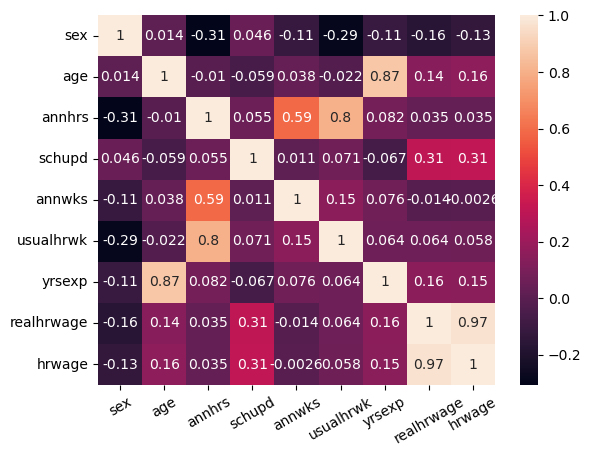

In [15]:
# plotting correlation heatmap
dataplot = sns.heatmap(df.corr(),annot=True) # data.corr takes all the numeric columns and do correlation analysis
  
# displaying heatmap
plt.xticks(rotation=30)
plt.show()

## Occupations:

Medical: medical professionals <br />Education: teachers <br />   durables: durables manufacturing <br />   retailtrade: retail traders <br />professional: professional services <br />publicadmin: public administrations <br /> nondurables: non-durables manufacturing <br /> SocArtOther: Social Work, Arts and Recreation, Other Services <br /> finance: finance <br />miningconstruction: Mining and construction <br />Transport: transport industry workers <br />hotelsrestaurants: hotels and restaurants <br />wholesaletrade: Wholesale trade <br />Communications: communications <br />Utilities: utilities <br />  Agriculture: agriculture <br /> 


We begin analyzing by creating a bar chart with all of the occupations in the data set and the amount of people within each profession.


In [16]:
# Counts the unique values in the "Occupation" category to see if there are any worth dropping
occ_counts = df['occupation'].value_counts()
print(occ_counts)

Medical               4298
Education             3762
durables              3430
retailtrade           2760
professional          2332
publicadmin           2330
nondurables           2300
SocArtOther           2148
finance               2059
miningconstruction    1882
Transport             1787
hotelsrestaurants     1479
wholesaletrade        1076
Communications         868
Utilities              480
Agriculture            312
Name: occupation, dtype: int64


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

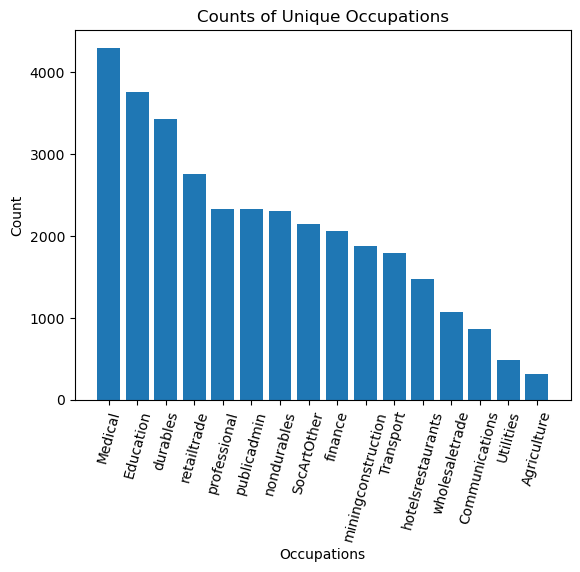

In [17]:
# Create a bar chart for the above values
plt.bar(occ_counts.index, occ_counts.values)
plt.title('Counts of Unique Occupations')
plt.xlabel('Occupations')
plt.ylabel('Count')
plt.xticks(rotation=75)

In [18]:
#drop all the workers who work in an occupation totalling under 1000 observations in this dataset
# from: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isin.html
df = df[~df['occupation'].isin(['Communications', 'Utilities', 'Agriculture'])]

In [19]:
#Checks to make sure our code worked properly
occ_counts = df['occupation'].value_counts()
print(occ_counts)

Medical               4298
Education             3762
durables              3430
retailtrade           2760
professional          2332
publicadmin           2330
nondurables           2300
SocArtOther           2148
finance               2059
miningconstruction    1882
Transport             1787
hotelsrestaurants     1479
wholesaletrade        1076
Name: occupation, dtype: int64


After dropping the occupations with too little data points, we are left with 13 occupations and this is the number of classes in our analysis.

In [20]:
df.head()

,sex,age,annhrs,schupd,annwks,usualhrwk,yrsexp,realhrwage,hrwage,occupation,race
0,1,34,1600,17,32.000000,50.0,12.0,14.447040,6.250000,finance,white
1,1,32,520,14,13.000000,40.0,14.0,40.429485,17.490385,durables,black
2,1,64,2550,12,51.000000,50.0,39.0,18.007324,17.725491,SocArtOther,black
3,1,50,3072,12,51.200001,60.0,30.0,10.349318,8.138021,wholesaletrade,white
4,1,26,2100,12,50.000000,42.0,8.0,18.347204,11.666667,nondurables,white


Wage is a very big definer of the occupation one might be in, so let's look at the wage distribution among occupations.

In [21]:
wage = np.array(df.realhrwage)

In [22]:
occupation_arr = np.array(df.occupation.unique())
occupation_arr

array(['finance', 'durables', 'SocArtOther', 'wholesaletrade',
       'nondurables', 'Medical', 'retailtrade', 'Education',
       'miningconstruction', 'hotelsrestaurants', 'Transport',
       'publicadmin', 'professional'], dtype=object)

In [23]:
avg_hr_wage = []

for i in occupation_arr:
    x=df[df.occupation==i] 
    avg_hr=sum(x.realhrwage)/len(x)
    avg_hr_wage.append(avg_hr)

avg_hr_wage

salary = []

for i in occupation_arr:
    x=df[df.occupation==i] 
    sal=sum((x.realhrwage) * (x.usualhrwk) * (x.annwks))/ len(x)
    salary.append(sal)

salary

[55649.364387624904,
 49165.2502689226,
 31007.8139757089,
 47558.67294586063,
 43954.00878737384,
 37987.00095214571,
 33914.117610188565,
 37612.783938448236,
 45425.47657796193,
 22589.05006006483,
 46617.762118187144,
 50681.5561831219,
 53370.50903822416]

In [24]:
df1=pd.DataFrame({'occupation':occupation_arr,'wage':salary}) 
df1.head(13)

,occupation,wage
0,finance,55649.364388
1,durables,49165.250269
2,SocArtOther,31007.813976
3,wholesaletrade,47558.672946
4,nondurables,43954.008787
5,Medical,37987.000952
6,retailtrade,33914.117610
7,Education,37612.783938
8,miningconstruction,45425.476578
9,hotelsrestaurants,22589.050060


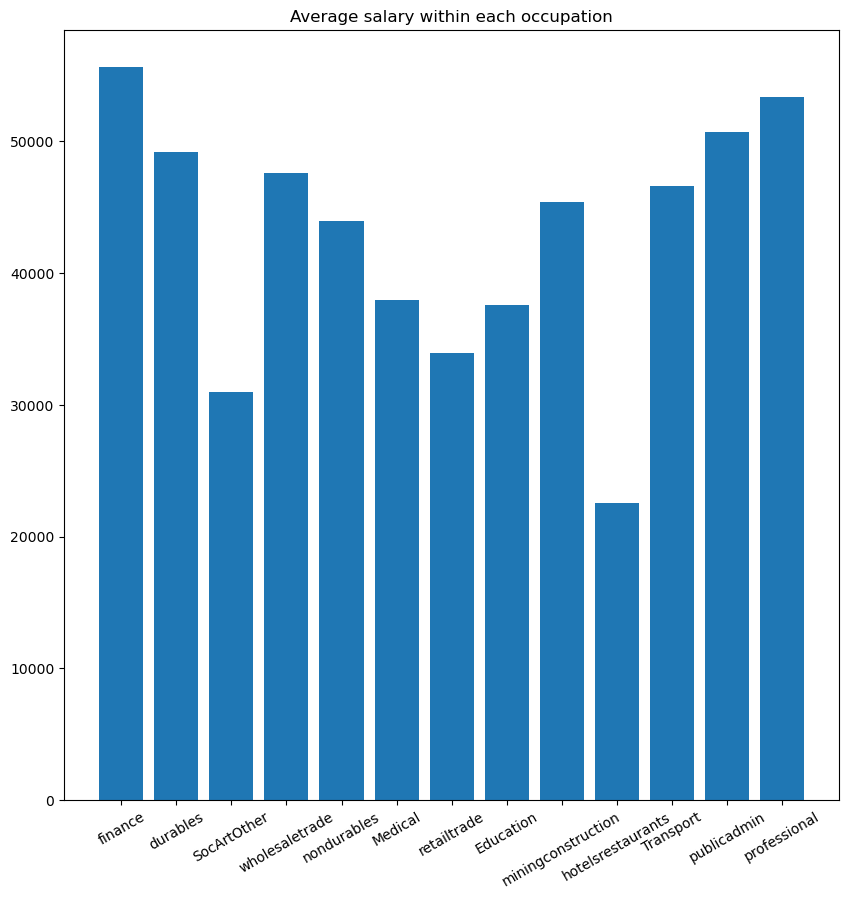

In [25]:
fig = plt.figure(figsize = [10,10])

plt.bar(occupation_arr, salary)
plt.title('Average salary within each occupation')
plt.xticks(rotation=30)
plt.show()

#what does professional mean in the data

As we can see, some occupations have a much higher average salary than others. Such as finance compared to hotelsrestaurants.

Next we will try and cluster all of the observations by ocupation, using age and wage. 

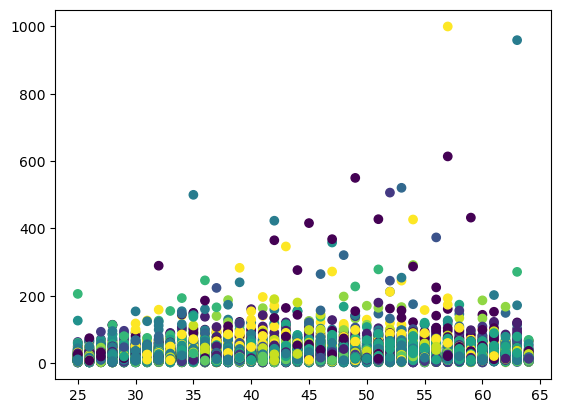

In [26]:
#Trying to cluster by Occupation, age and wage, code from class
occ_names = df.occupation.unique()
occ_nums = list(range(len(occ_names)))
mappings = dict(zip(occ_names,occ_nums))
mappings

numbers = []
for i in df.occupation:
    numbers.append(mappings[i])
    
plt.scatter(df.age,df.realhrwage,c=numbers)

## Occupational Conclusions

The amount of people in each professional field, the average salaries per job, and the overall clustering of age and wage with occupation as the categorical variable, highlight interesting information about the data set. Looking at the bar chart of the amount of people per profession we believe there is a pattern of jobs with the most amount of workers having the lower annual salaries. A possible supporting factor of this could be explained in the economic theory that as supply of labor in a specific job market increases with no increase in demand, the wage decreases. This trend is visible in professions such as medical and education, with those two being the most popular but having the lowest average salary. On the other side of the spectrum, finance workers are limited in numbers but have the highest average annual salary. However, this theory could be challenged by the fact that SocArtOther and Mining construction have small amounts of workers and small wages, but this is also just a theory.

The cluster map also demonstrates that when clustering by occupation, each occupation contains a diverse pool of different ages and wages.

We will continue our analysis and overall exploration of this data set with a focus on the demographic of each worker.

## Demographics Visualizations

To start off, we wanted to make some visualizations to highlight the different demographics in the dataset, starting with age.

(array([4471., 4640., 4189., 3695., 3356., 3186., 3016., 2389., 1814.,
         887.]),
 array([25. , 28.9, 32.8, 36.7, 40.6, 44.5, 48.4, 52.3, 56.2, 60.1, 64. ]),
 <BarContainer object of 10 artists>)

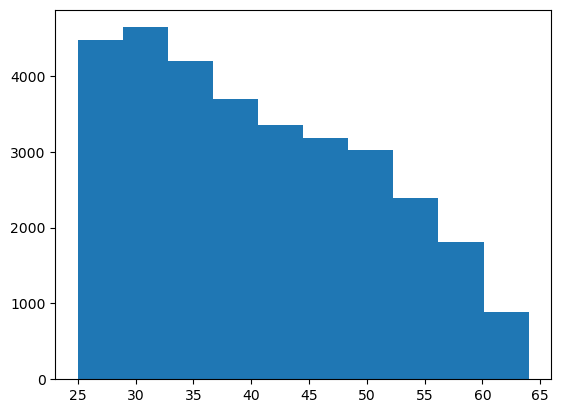

In [27]:
plt.hist(df.age)

As you can see, the histogram displays an uneven distribution of ages, primarily drawing from people under 40, especially counting those in their late 20s and 30s. However the decrease in numbers as age increases is indicative of people possibly leaving the workforce as they get older and can retire.

Next we looked at the races within our data.

white      20305
black       9979
hisp         963
othrace      396
Name: race, dtype: int64


([<matplotlib.patches.Wedge at 0x274a7d66880>,
 [Text(-0.47363540554124867, 0.9928088953155976, 'White'),
  Text(0.33578239746567706, -1.0474971033622014, 'Black'),
  Text(1.0833443555792934, -0.19069611226893377, 'Hispanic'),
  Text(1.0991499635152717, -0.04323606948344227, 'Other')],
 [Text(-0.25834658484068107, 0.5415321247175986, '64.2'),
  Text(0.18315403498127839, -0.5713620563793824, '31.5'),
  Text(0.5909151030432509, -0.10401606123760022, '3.0'),
  Text(0.5995363437356027, -0.023583310627332144, '1.3')])

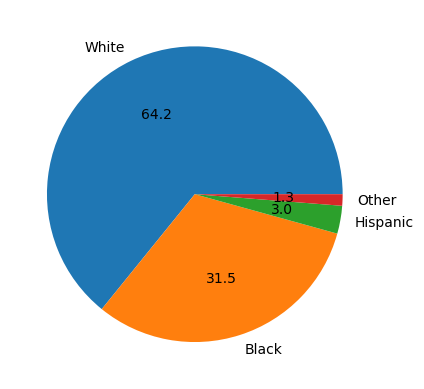

In [28]:
race_counts = df['race'].value_counts()
print(race_counts)

races = ['White', 'Black', 'Hispanic', 'Other']
plt.pie(race_counts, labels = races, autopct='%.1f')

This pie chart demonstrates that the dominant race within our data was white, followed by black, then hispanic, and lastly other. It is important to note that this uneven split means that any conclusions we may draw from our analysis cannot be reasonably used to draw assumptions about all of the races listed.

Next, similarly to what we did with occupation, we looked at age and wage but through the lense of gender.

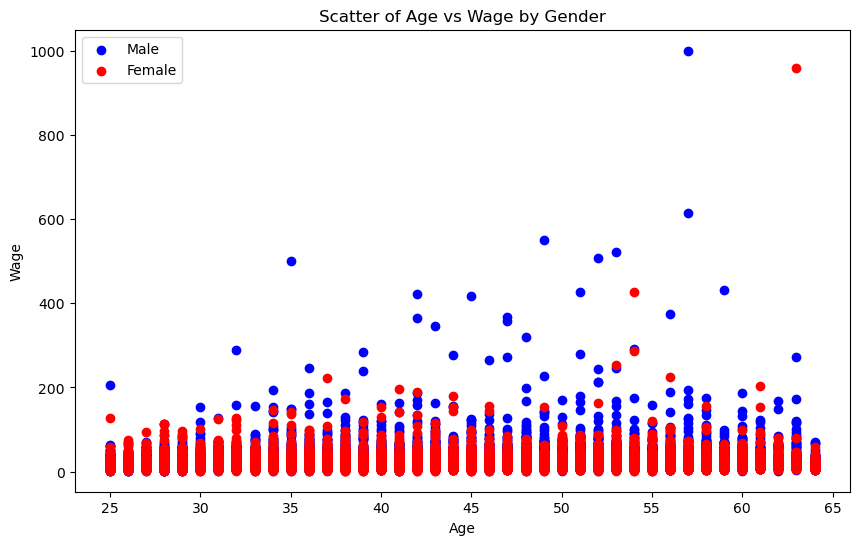

In [29]:
fig = plt.figure(figsize = [10,6])
age = np.array(df.age)
wage = np.array(df.realhrwage)
sex = np.array(df.sex)

# create scatter plots for each gender
plt.scatter(age[sex==1], wage[sex==1], c='b', label='Male')
plt.scatter(age[sex==2], wage[sex==2], c='r', label='Female')
plt.title('Scatter of Age vs Wage by Gender')
plt.xlabel('Age')
plt.ylabel('Wage')
plt.legend()
plt.show()

The scatterplot highlights the underlying pay inequality we know to be true between men and women. There is obviously quite a bit of overlap, but the blue points, or the men, display a tendency to have a higher wage then the red points, the women, regardless of age. It is also important to note that there are a few outliers, two more obvious than the rest, but most of them are men, again showinging that men tend to have a higher wage than women.

Lastly, we created several bar charts to look at the distibution of men and women within each occupation.

First, using the occupation as the variables, we assigned each variable with all the rows in the dataframe with the associated occupation.

In [77]:
finance = df[df.occupation == 'finance']
durables = df[df.occupation == 'durables']
socartother = df[df.occupation == 'SocArtOther']
wholesaletrade = df[df.occupation == 'wholesaletrade']
nondurables = df[df.occupation == 'nondurables']
medical = df[df.occupation == 'Medical']
retailtrade = df[df.occupation == 'retailtrade']
education = df[df.occupation == 'Education']
miningconstruction = df[df.occupation == 'miningconstruction']
hotelsrestaurants = df[df.occupation == 'hotelsrestaurants']
transport = df[df.occupation == 'Transport']
publicadmin = df[df.occupation == 'publicadmin']
professional = df[df.occupation == 'professional']


,sex,age,annhrs,schupd,annwks,usualhrwk,yrsexp,realhrwage,hrwage,occupation,race,races
3,1,50,3072,12,51.200001,60.0,30.0,10.349318,8.138021,wholesaletrade,white,1
37,1,30,880,13,22.000000,40.0,10.0,24.145079,22.500000,wholesaletrade,white,1
38,1,28,3028,10,50.000000,40.0,9.0,7.710177,3.335535,wholesaletrade,black,2
40,1,49,2896,14,50.799999,57.0,28.0,8.607412,6.768301,wholesaletrade,black,2
55,1,46,1950,16,39.000000,50.0,23.0,44.025219,41.025642,wholesaletrade,white,1
...,...,...,...,...,...,...,...,...,...,...,...,...
33248,2,38,1968,14,49.200001,40.0,19.0,13.932747,10.955792,wholesaletrade,white,1
33285,2,29,2000,16,50.000000,40.0,9.0,47.500000,47.500000,wholesaletrade,white,1
33341,2,47,2040,13,51.000000,36.0,23.0,8.465832,8.333333,wholesaletrade,black,2
33344,2,51,3005,14,50.000000,60.0,26.0,13.311148,13.311148,wholesaletrade,white,1


Next, we looped through the data in the variables to find the points at which the individual was a male or a female and assign that to a variable named by occupation and gender.

In [84]:
finance_m = 0
finance_f = 0
for i in finance.sex:
    if i == 1:
        finance_m+=1
    else:
        finance_f+=1
        
durables_m = 0
durables_f = 0
for i in durables.sex:
    if i == 1:
        durables_m+=1
    else:
        durables_f+=1
        
socart_m = 0
socart_f = 0
for i in socartother.sex:
    if i == 1:
        socart_m+=1
    else:
        socart_f+=1
        
wholesale_m = 0
wholesale_f = 0
for i in wholesaletrade.sex:
    if i == 1:
        wholesale_m+=1
    else:
        wholesale_f+=1
        
nondurables_m= 0
nondurables_f= 0
for i in nondurables.sex:
    if i == 1:
        nondurables_m+=1
    else:
        nondurables_f+=1

medical_m = 0
medical_f = 0
for i in medical.sex:
    if i == 1:
        medical_m+=1
    else:
        medical_f+=1
        
retail_m = 0
retail_f = 0
for i in retailtrade.sex:
    if i == 1:
        retail_m +=1
    else:
        retail_f+=1

educ_m = 0 
educ_f = 0
for i in education.sex:
    if i == 1:
        educ_m+=1
    else:
        educ_f+=1
        
mining_m = 0 
mining_f = 0
for i in miningconstruction.sex:
    if i == 1:
        mining_m+=1
    else:
        mining_f+=1
        
hotels_m = 0
hotels_f = 0
for i in hotelsrestaurants.sex:
    if i == 1:
        hotels_m+=1
    else:
        hotels_f+=1
        
transport_m = 0
transport_f = 0
for i in transport.sex:
    if i == 1:
        transport_m+=1
    else:
        transport_f+=1
        
pubadmin_m= 0
pubadmin_f = 0
for i in publicadmin.sex:
    if i == 1:
        pubadmin_m+=1
    else:
        pubadmin_f+=1
        
professional_m = 0
professional_f = 0
for i in professional.sex:
    if i == 1:
        professional_m+=1
    else:
        professional_f+=1    
   

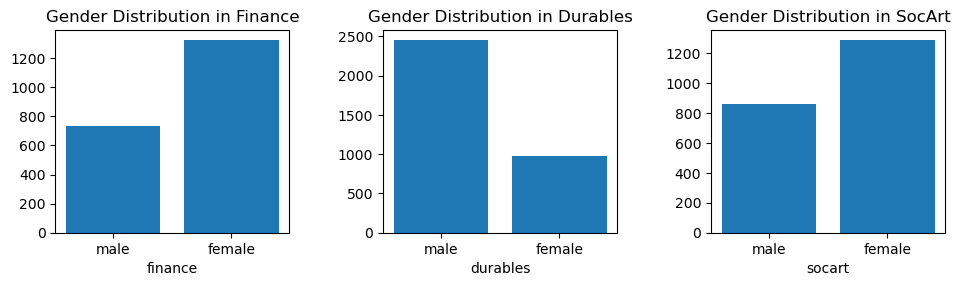

In [85]:
fig = plt.figure(figsize = [10,10])

plt.subplot(3,3,1)
plt.bar(['male','female'],[finance_m,finance_f])
plt.xlabel("finance")
plt.title('Gender Distribution in Finance')

plt.subplot(3,3,2)
plt.bar(['male','female'],[durables_m, durables_f])
plt.xlabel("durables")
plt.title('Gender Distribution in Durables')

plt.subplot(3,3,3)
plt.bar(['male','female'],[socart_m, socart_f])
plt.xlabel("socart")
plt.title('Gender Distribution in SocArt')

plt.subplots_adjust(left=0.01,wspace=0.4, hspace=0.4)

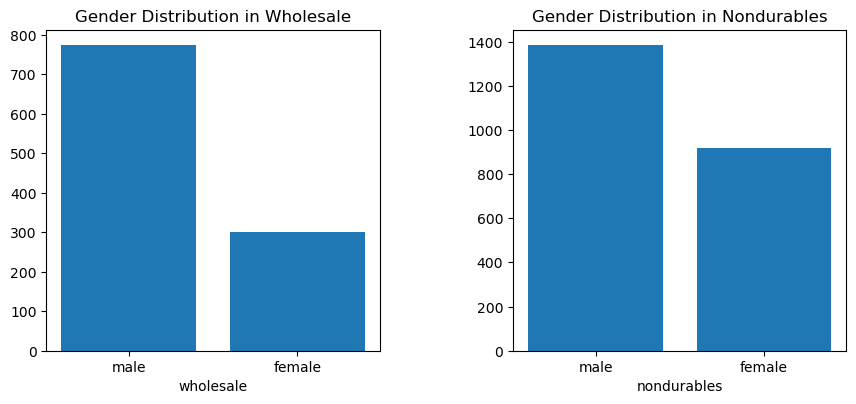

In [86]:
fig = plt.figure(figsize = [10,10])

plt.subplot(2,2,1)
plt.bar(['male','female'],[wholesale_m, wholesale_f])
plt.xlabel("wholesale")
plt.title('Gender Distribution in Wholesale') 

plt.subplot(2,2,2)
plt.bar(['male','female'],[nondurables_m,nondurables_f])
plt.xlabel("nondurables")
plt.title('Gender Distribution in Nondurables')

plt.subplots_adjust(left=0.1, wspace=0.4, hspace=0.4)

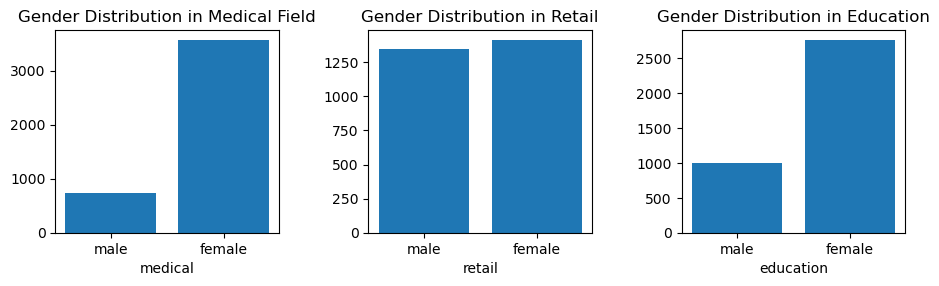

In [87]:
fig = plt.figure(figsize = [10,10])

plt.subplot(3,3,1)
plt.bar(['male','female'],[medical_m, medical_f])
plt.xlabel("medical")
plt.title('Gender Distribution in Medical Field')

plt.subplot(3,3,2)
plt.bar(['male','female'],[retail_m, retail_f])
plt.xlabel("retail")
plt.title('Gender Distribution in Retail')

plt.subplot(3,3,3)
plt.bar(['male','female'],[educ_m, educ_f])
plt.xlabel("education")
plt.title('Gender Distribution in Education')

plt.subplots_adjust(left=0.05, wspace=0.4, hspace=0.4)

plt.show()

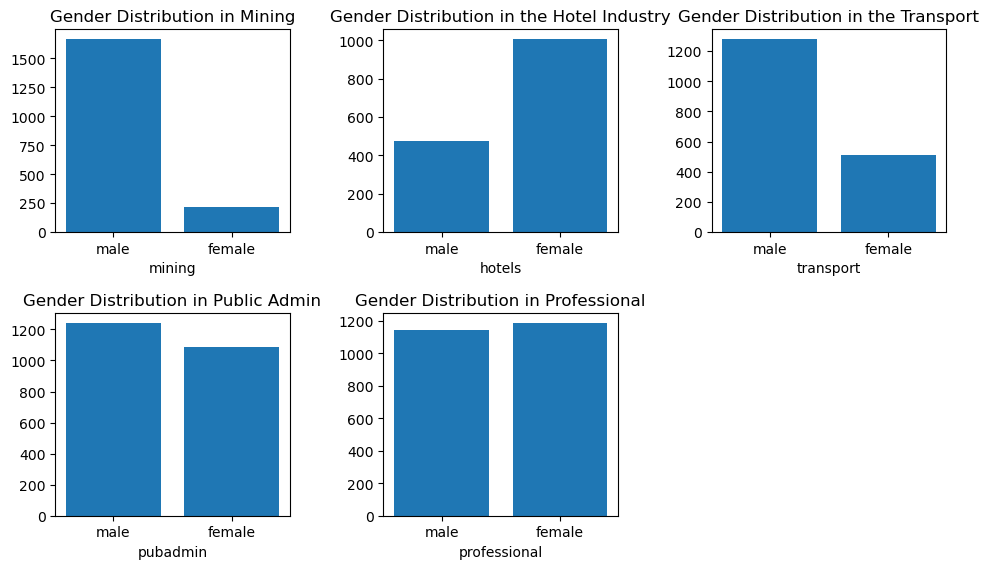

In [91]:
fig = plt.figure(figsize = [10,10])
plt.subplot(3,3,1)
plt.bar(['male','female'],[mining_m, mining_f])
plt.xlabel("mining")
plt.title('Gender Distribution in Mining')

plt.subplot(3,3,2)
plt.bar(['male','female'],[hotels_m, hotels_f])
plt.xlabel("hotels")
plt.title('Gender Distribution in the Hotel Industry')

plt.subplot(3,3,3)
plt.bar(['male','female'],[transport_m, transport_f])
plt.xlabel("transport")
plt.title('Gender Distribution in the Transport')

plt.subplot(3,3,4)
plt.bar(['male','female'],[pubadmin_m, pubadmin_f])
plt.xlabel("pubadmin")
plt.title('Gender Distribution in Public Admin')

plt.subplot(3,3,5)
plt.bar(['male','female'],[professional_m, professional_f])
plt.xlabel("professional")
plt.title('Gender Distribution in Professional')


plt.subplots_adjust(left=0.009,
                    wspace=0.4,
                    hspace=0.4)
plt.show()

## Demographics Conclusions

Understanding the demographics of the dataset is a very important part of any data exploration. In our case, our analysis demostrated that the distribution of age is heavily skewed to have younger people present, and the gender split is relatively even, and our data is predominately white people. We also were able to visualize in a scatterplot the fact that men tend to have higher wage and the outliers present are mostly men, further instilling this conclusion. 

Lastly, and arguably the most important conclusion, is found in the gender distribution within each occupation bar charts. Obviously, there are several that are more male or female, but we decided to look at if their was a connection between the highest paying jobs and their gender composition. Looking at the top three highest paying jobs (on average) finance, publicadmin, and professional, the difference between the amount of each gender is not significant. Looking at the three lowest paying occupations, socart, retail, and mining, there again does not seem to be a defining pattern. Mining is predominantly male which could point out a potential relationship if SocArt was not predominantly female, essentially debunking a potential bias for either gender.

Looking through the different demographic information, we definitely can say wholeheartedly that our data is diverse.

## Prediction

The code is not in correct format for prediction so we convert occupations and race string values to integers.

In [92]:
data = df
data

,sex,age,annhrs,schupd,annwks,usualhrwk,yrsexp,realhrwage,hrwage,occupation,race,races
0,1,34,1600,17,32.000000,50.0,12.0,14.447040,6.250000,finance,white,1
1,1,32,520,14,13.000000,40.0,14.0,40.429485,17.490385,durables,black,2
2,1,64,2550,12,51.000000,50.0,39.0,18.007324,17.725491,SocArtOther,black,2
3,1,50,3072,12,51.200001,60.0,30.0,10.349318,8.138021,wholesaletrade,white,1
4,1,26,2100,12,50.000000,42.0,8.0,18.347204,11.666667,nondurables,white,1
...,...,...,...,...,...,...,...,...,...,...,...,...
33393,2,34,2510,17,50.000000,50.0,16.0,23.182011,14.741035,Medical,white,1
33394,2,54,1760,12,44.000000,48.0,35.0,29.154125,12.612500,Education,white,1
33395,2,33,1968,12,49.000000,40.0,3.0,8.795075,3.804878,professional,black,2
33396,2,25,2048,11,51.200001,40.0,6.0,11.177263,8.789062,Medical,black,2


This code converts the race into integers so that it can be used in the prediction model.

In [93]:
race_to_num = {'white':1,'black':2, 'hisp':3,'othrace':4}

In [94]:
races = data.race.replace(race_to_num)
data['races'] = races
data = data.drop(['race'], axis=1)
data

,sex,age,annhrs,schupd,annwks,usualhrwk,yrsexp,realhrwage,hrwage,occupation,races
0,1,34,1600,17,32.000000,50.0,12.0,14.447040,6.250000,finance,1
1,1,32,520,14,13.000000,40.0,14.0,40.429485,17.490385,durables,2
2,1,64,2550,12,51.000000,50.0,39.0,18.007324,17.725491,SocArtOther,2
3,1,50,3072,12,51.200001,60.0,30.0,10.349318,8.138021,wholesaletrade,1
4,1,26,2100,12,50.000000,42.0,8.0,18.347204,11.666667,nondurables,1
...,...,...,...,...,...,...,...,...,...,...,...
33393,2,34,2510,17,50.000000,50.0,16.0,23.182011,14.741035,Medical,1
33394,2,54,1760,12,44.000000,48.0,35.0,29.154125,12.612500,Education,1
33395,2,33,1968,12,49.000000,40.0,3.0,8.795075,3.804878,professional,2
33396,2,25,2048,11,51.200001,40.0,6.0,11.177263,8.789062,Medical,2


This code converts the occupations to integers in order to fit and train the data for prediction.

In [95]:
occupation_to_num = {'finance':1,'durables':2, 'SocArtOther':3,'wholesaletrade':4, 'nondurables':5, 'Medical':6, 'retailtrade':7,'Education':8,'miningconstruction':9,'hotelsrestaurants':10, 'Transport':11, 'publicadmin':12, 'professional':13}

Next, we create a variable that will be used for assigning the features that we're interested in predicting. We also converted this data into an array to make the prediction process easier. 

In [96]:
labels = np.array(data.occupation.replace(occupation_to_num))
labels

array([ 1,  2,  3, ..., 13,  6,  6], dtype=int64)

Now, we drop the dependent variable, since logistic regression takes into account all the variables in the dataframe, and we are trying to predict occupation, we dropped it to avoid the model using the occupation column as a means to predict occupation and thus we end up with a perfectly accurate model, which would be incorrect.

In [97]:
data = data.drop(['occupation'], axis=1)
data

,sex,age,annhrs,schupd,annwks,usualhrwk,yrsexp,realhrwage,hrwage,races
0,1,34,1600,17,32.000000,50.0,12.0,14.447040,6.250000,1
1,1,32,520,14,13.000000,40.0,14.0,40.429485,17.490385,2
2,1,64,2550,12,51.000000,50.0,39.0,18.007324,17.725491,2
3,1,50,3072,12,51.200001,60.0,30.0,10.349318,8.138021,1
4,1,26,2100,12,50.000000,42.0,8.0,18.347204,11.666667,1
...,...,...,...,...,...,...,...,...,...,...
33393,2,34,2510,17,50.000000,50.0,16.0,23.182011,14.741035,1
33394,2,54,1760,12,44.000000,48.0,35.0,29.154125,12.612500,1
33395,2,33,1968,12,49.000000,40.0,3.0,8.795075,3.804878,2
33396,2,25,2048,11,51.200001,40.0,6.0,11.177263,8.789062,2


In this part, we split the data using train_test_split() to split the data into training and testing data, after which it can be fitted by the model. 

In [98]:
X_train, x_test, Y_train, y_test = train_test_split(data, labels, test_size=0.4, random_state=42)

X_train = np.array(X_train)
x_test = np.array(x_test)
Y_train = np.array(Y_train)
y_test = np.array(y_test)

print(X_train.shape, x_test.shape, Y_train.shape, y_test.shape)

(18985, 10) (12658, 10) (18985,) (12658,)


Here we use Logistic Regression prediction technique to fit the data to the model. 

In [99]:
#Note: this code takes about a minute to run.
model = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial',max_iter=10000)
model.fit(X_train,Y_train)

LogisticRegression(max_iter=10000, multi_class='multinomial', random_state=0)

Lastly, we predict our model using .predict() and get the accuracy of the model's prediction using accuracy_score.

In [101]:
from sklearn.metrics import accuracy_score as accuracy_score

y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy score: ", accuracy)

Accuracy score:  0.23897930162742928


## Conclusions

One possible reason for the low accuracy of our model is due to the noise the data. In our prediction, we were trying to predict 13 occupations using 10 independent variables. Another contributor of noise in the data could be that some of the variables had very high correlations with each either and could essentially be substituted for each other. For example, years of experience and age had a correlation of 0.87, and real hourly wage (adjusted for inflation respectively) and hourly wage had a correlation of 0.97. This shows that either one of these variables could have been removed to make our data more concise and perhaps resulting is a better prediction. Another possible cause for our low prediction score could be the presence of outliers. Outliers can have a disproportionate impact on the logistic regression model, leading to poor performance. In both of the scatterplots we created, age on wage by occupation and age on wage by gender, there are a fairly large amount of outliers. 

Therefore, a solution to this would be to remove those kinds of variables, this would help reduce the noise in the data. Another solution would be to use less variables. Some of our variables may have been less relevant to predicting occupation, such as annual number of weeks worked and annual number of hours worked and replaced with a more defining variable like salary. Also, we believe that if we omitted participants making over $200 an hour, the issue of outliers would be removed and possibly improve our prediction value.
